Own model applied with F1 score of 46% (current rank #19 and highest score is 53.9% on public leaderboard).(Due to shortage of time as there was a deadline for submission, I haven't tried and experimented with any classification model like Xgboost yet.)
Once the Private leaderboard is out, I'll implement a xgboost classification model with K modes clustering of customers
for checking if it can beat my current score that I've built through own understanding and past experience.


In [2]:
import pandas as pd
import numpy as np

In [1]:
import geopandas

In [3]:


def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    #print(var,l,t)
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

In [4]:
Cd=pd.read_excel('Customer_Demographics.xlsx')

In [5]:
Ct=pd.read_excel('Customer_Transaction.xlsx')

In [135]:
Sm=pd.read_excel('Store_Master.xlsx')

In [7]:
test=pd.read_excel('Test_Set.xlsx')

In [9]:
Cd.head()

,Customer_ID,Territory,Nationality,Income_Range,Job_Type,Marital_Status,Gender,State,Language,Loyalty_Status,Birth_date,Age,Points,First_txn_dt,Last_accr_txn_dt,Last_rdm_txn_dt
0,1800000006365760,United Arab Emirates,INDIA,Below 5000,Services,Married,M,Abu Dhabi,English,Gold,01JUN1959:00:00:00,59.0,814.0,02NOV2010:00:00:00,27SEP2018:21:45:25,11MAR2018:19:11:57
1,1800000006365820,United Arab Emirates,UNITED ARAB EMIRATES,Below 5000,Services,Married,F,Abu Dhabi,Arabic,Silver,01JAN1900:00:00:00,NaN,212.0,06DEC2010:00:00:00,16AUG2016:21:08:28,16MAR2015:13:39:12
2,1800000006366060,United Arab Emirates,SRI LANKA,Below 5000,Services,Married,M,Abu Dhabi,English,Silver,07JUN1959:00:00:00,59.0,186.0,17FEB2011:00:00:00,31AUG2018:20:52:18,30JAN2017:19:19:19
3,1800000006366230,United Arab Emirates,JORDAN,Below 5000,Services,Married,F,Abu Dhabi,Arabic,Silver,21JAN1962:00:00:00,57.0,126.0,30OCT2010:00:00:00,30JUL2018:20:30:05,20JUN2017:17:57:27
4,1800000006366570,United Arab Emirates,OCCUPIED PALESTINIAN TERRITORY,Below 5000,Services,Married,M,Abu Dhabi,Arabic,Silver,01JAN1900:00:00:00,NaN,197.0,10NOV2010:00:00:00,03SEP2018:22:10:56,17JUN2017:23:08:28


In [154]:
Cd.Income_Range.unique()

array(['Below 5000', '5001 to 10000', 'Unknown', '10001 to 20000',
       '20001 to 30000', '30001 & Above', 'Unspecified'], dtype=object)

In [10]:
Cd.shape

(100000, 16)

In [11]:
describe_more(Cd)

,Variable,Levels,Datatype
1,Territory,1,object
9,Loyalty_Status,2,object
6,Gender,3,object
8,Language,3,object
3,Income_Range,7,object
5,Marital_Status,7,object
7,State,13,object
4,Job_Type,19,object
11,Age,103,float64
2,Nationality,223,object


In [12]:
Cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
Customer_ID         100000 non-null int64
Territory           100000 non-null object
Nationality         100000 non-null object
Income_Range        100000 non-null object
Job_Type            100000 non-null object
Marital_Status      100000 non-null object
Gender              100000 non-null object
State               100000 non-null object
Language            100000 non-null object
Loyalty_Status      100000 non-null object
Birth_date          82462 non-null object
Age                 73904 non-null float64
Points              97137 non-null float64
First_txn_dt        99967 non-null object
Last_accr_txn_dt    99994 non-null object
Last_rdm_txn_dt     71581 non-null object
dtypes: float64(2), int64(1), object(13)
memory usage: 12.2+ MB


In [148]:
Cd[Cd.Age.isnull()].Birth_date.unique()

array(['01JAN1900:00:00:00', nan], dtype=object)

In [8]:
import datetime


In [9]:
Cd['Last_accr_txn_date']=Cd.Last_accr_txn_dt.apply(lambda z: datetime.datetime.strptime(z,'%d%b%Y:%H:%M:%S').date() if z is not np.nan else None )

In [10]:
Cd['Last_accr_txn_hour']=Cd.Last_accr_txn_dt.apply(lambda z: datetime.datetime.strptime(z,'%d%b%Y:%H:%M:%S').hour if z is not np.nan else None )

In [11]:
Cd['Last_rdm_txn_date']=Cd.Last_rdm_txn_dt.apply(lambda z: datetime.datetime.strptime(z,'%d%b%Y:%H:%M:%S').date() if z is not np.nan else None )

In [12]:
Cd['Last_rdm_txn_hour']=Cd.Last_rdm_txn_dt.apply(lambda z: datetime.datetime.strptime(z,'%d%b%Y:%H:%M:%S').hour if z is not np.nan else None )

In [13]:
Cd['First_txn_date']=Cd.First_txn_dt.apply(lambda z: datetime.datetime.strptime(z,'%d%b%Y:%H:%M:%S').date() if z is not np.nan else None )

In [14]:
Cd['First_txn_hour']=Cd.First_txn_dt.apply(lambda z: datetime.datetime.strptime(z,'%d%b%Y:%H:%M:%S').hour if z is not np.nan else None )

In [96]:
Cd.Last_accr_txn_hour.unique()

array([21., 20., 22., 13., 18., 16., 19., 17., 12., 11., 15.,  9., 14.,
        0., 23., 10.,  7.,  1.,  8.,  6.,  3.,  4.,  2.,  5., nan])

In [15]:
Cd['Last_accr_txn_date']=pd.to_datetime(Cd['Last_accr_txn_date'],errors='coerce')

In [16]:
Cd['Last_rdm_txn_date']=pd.to_datetime(Cd['Last_rdm_txn_date'],errors='coerce')

In [17]:
Cd['First_txn_date']=pd.to_datetime(Cd['First_txn_date'],errors='coerce')

In [18]:
Cd['Months']=(Cd.Last_accr_txn_date- Cd.Last_rdm_txn_date)

In [19]:
Cd['Months_from_first']=(Cd.Last_accr_txn_date - Cd.First_txn_date)

In [20]:
Cd.Months_from_first=Cd.Months_from_first.dt.days/30

In [21]:
Cd.Months=Cd.Months.dt.days/30

In [208]:
Cd[Cd.Months.isnull()].shape

(28419, 24)

In [212]:
Cd.Last_rdm_txn_date.dt.year

0        2018.0
1        2015.0
2        2017.0
3        2017.0
4        2017.0
5        2017.0
6        2018.0
7        2016.0
8        2018.0
9        2018.0
10       2016.0
11       2016.0
12       2018.0
13       2017.0
14       2015.0
15       2018.0
16       2018.0
17       2017.0
18       2018.0
19       2018.0
20       2018.0
21       2018.0
22       2018.0
23       2018.0
24       2018.0
25       2018.0
26       2018.0
27       2018.0
28       2015.0
29       2018.0
          ...  
99970       NaN
99971       NaN
99972       NaN
99973       NaN
99974       NaN
99975       NaN
99976       NaN
99977       NaN
99978       NaN
99979    2018.0
99980       NaN
99981       NaN
99982       NaN
99983       NaN
99984       NaN
99985       NaN
99986       NaN
99987       NaN
99988       NaN
99989       NaN
99990       NaN
99991       NaN
99992       NaN
99993       NaN
99994    2017.0
99995    2018.0
99996    2017.0
99997    2018.0
99998    2018.0
99999    2018.0
Name: Last_rdm_txn_date,

In [162]:
Ct.shape

(544649, 16)

In [22]:
Ct['cid']=Ct.Customer_ID

In [84]:
Ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544649 entries, 0 to 544648
Data columns (total 15 columns):
Territory           544649 non-null object
Business            544649 non-null object
Year                544649 non-null int64
Week                544649 non-null int64
Store_Code          544649 non-null int64
City_Name           505464 non-null object
Store_Type          505464 non-null object
Transaction_Type    544649 non-null object
Return_Reason       37014 non-null object
Customer_ID         544649 non-null int64
Invoices            544649 non-null int64
Item_Count          544649 non-null int64
Revenue             544649 non-null float64
Discount            544649 non-null float64
Units_Sold          544649 non-null int64
dtypes: float64(2), int64(7), object(6)
memory usage: 62.3+ MB


In [83]:
describe_more(Ct)

,Variable,Levels,Datatype
0,Territory,1,object
1,Business,1,object
6,Store_Type,1,object
7,Transaction_Type,2,object
2,Year,3,int64
5,City_Name,7,object
8,Return_Reason,16,object
10,Invoices,16,int64
4,Store_Code,32,int64
3,Week,54,int64


In [135]:
Ct.head()

,Territory,Business,Year,Week,Store_Code,City_Name,Store_Type,Transaction_Type,Return_Reason,Customer_ID,Invoices,Item_Count,Revenue,Discount,Units_Sold
0,United Arab Emirates,Max,2010,0,60065,Dubai,Stand alone,Return,Size Problem,1800000058056860,1,3,-169.0,0.0,-3
1,United Arab Emirates,Max,2016,0,60053,NaN,NaN,Purchase,NaN,1800000020917140,1,1,0.0,0.0,0
2,United Arab Emirates,Max,2016,0,60053,NaN,NaN,Purchase,NaN,1800000021265010,1,1,0.0,0.0,0
3,United Arab Emirates,Max,2016,0,60053,NaN,NaN,Purchase,NaN,1800000025693950,1,4,0.0,0.0,0
4,United Arab Emirates,Max,2016,0,60053,NaN,NaN,Purchase,NaN,1800000044104620,1,1,0.0,0.0,0


In [185]:
ct_recent=Ct.groupby(['Customer_ID','Store_Code','City_Name','Store_Type'],as_index=False).agg({'cid':'count','Invoices':'sum','Revenue':'sum','Units_Sold':'sum'})

In [ ]:
ct_recent.

In [215]:
ct_recent=ct_recent.groupby(['Customer_ID','Store_Code'],as_index=False).agg({'Week':'max','Year':'max'})

In [156]:
Ct.Year.unique()

array([2010, 2016, 2017])

In [221]:
Ct.Week.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [206]:
Ct.Store_Type.unique()

array(['Stand alone', nan], dtype=object)

In [23]:
for i in ['City_Name','Store_Type']:
    for j in Ct['Store_Code'].unique():
        try:
            Ct.loc[(Ct.Store_Code==j)&(Ct[i].isnull()),i]=Ct.loc[(Ct.Store_Code==j)&(Ct[i].notnull()),i].unique()[0]
        except:
            pass

In [192]:
Ct.loc[Ct.Store_Code==60084,'City_Name'].unique()

array([nan], dtype=object)

In [186]:
Ct.City_Name.unique()

array(['Dubai', 'Abu Dhabi', 'Ajman', 'Al Ain', 'Fujairah',
       'Ras Al Khaimah', 'Sharjah', nan], dtype=object)

In [198]:
Ct.columns

Index(['Territory', 'Business', 'Year', 'Week', 'Store_Code', 'City_Name',
       'Store_Type', 'Transaction_Type', 'Return_Reason', 'Customer_ID',
       'Invoices', 'Item_Count', 'Revenue', 'Discount', 'Units_Sold', 'cid'],
      dtype='object')

In [252]:
Ct[(Ct.Revenue>0)&(Ct.Transaction_Type=='Return')]

,Territory,Business,Year,Week,Store_Code,City_Name,Store_Type,Transaction_Type,Return_Reason,Customer_ID,Invoices,Item_Count,Revenue,Discount,Units_Sold,cid
220920,United Arab Emirates,Max,2016,44,60069,Abu Dhabi,Stand alone,Return,NaN,1800000219724040,1,3,7.105427e-15,0.0,0,1800000219724040
239048,United Arab Emirates,Max,2016,48,60074,Sharjah,Stand alone,Return,NaN,1800000236630560,1,4,3.552714e-15,0.0,0,1800000236630560
259503,United Arab Emirates,Max,2016,52,60053,Abu Dhabi,Stand alone,Return,NaN,1800000011803130,1,4,3.552714e-15,0.0,0,1800000011803130


In [76]:
Ct.to_csv('Ct.csv',index=False)
Cd.to_csv('Cd.csv',index=False)

In [24]:
ct=Ct.groupby(['Customer_ID','Store_Code','City_Name','Store_Type'],as_index=False).agg({'cid':'count','Invoices':'sum','Revenue':'sum','Units_Sold':'sum'})

In [77]:
ct_store=Ct.groupby(['Store_Code'],as_index=False).agg({'Customer_ID':'nunique','cid':'count'})

In [78]:
ct_store.head()

,Store_Code,Customer_ID,cid
0,60053,22450,86280
1,60054,9213,26416
2,60055,3525,10651
3,60057,6443,24454
4,60058,4773,15544


In [27]:
ct_storecount=ct.groupby(['Customer_ID'],as_index=False).agg({'Store_Code':'count'})
ct_storecount['Store_Count']=ct_storecount.Store_Code
ct_storecount.drop('Store_Code',inplace=True,axis=1)

In [28]:
ct=ct.merge(ct_storecount,on=('Customer_ID'), how='left')

In [79]:
ct_store['Customer_Count']=ct_store.Customer_ID
ct_store.drop(['Customer_ID','cid'],axis=1,inplace=True)
ct=ct.merge(ct_store,on='Store_Code',how='left')

In [82]:
ct.head()

,Customer_ID,Store_Code,City_Name,Store_Type,cid,Invoices,Revenue,Units_Sold,Store_Count,Customer_Count
0,1800000006365760,60067,Abu Dhabi,Stand alone,4,5,1117.0,40,1,14259
1,1800000006365820,60054,Abu Dhabi,Stand alone,1,1,260.0,6,1,9213
2,1800000006366060,60066,Dubai,Stand alone,1,1,188.0,15,4,3025
3,1800000006366060,60069,Abu Dhabi,Stand alone,1,1,102.0,3,4,16103
4,1800000006366060,60079,Abu Dhabi,Stand alone,2,3,166.0,6,4,3837


In [216]:
ct=ct.merge(ct_recent,on=('Customer_ID','Store_Code'), how= 'left')

In [218]:
ct.head()

,Customer_ID,Store_Code,City_Name,Store_Type,cid,Invoices,Revenue,Units_Sold,Store_Count,Customer_Count,Week,Year
0,1800000006365760,60067,Abu Dhabi,Stand alone,4,5,1117.0,40,1,14259,48,2017
1,1800000006365820,60054,Abu Dhabi,Stand alone,1,1,260.0,6,1,9213,21,2016
2,1800000006366060,60066,Dubai,Stand alone,1,1,188.0,15,4,3025,29,2016
3,1800000006366060,60069,Abu Dhabi,Stand alone,1,1,102.0,3,4,16103,18,2016
4,1800000006366060,60079,Abu Dhabi,Stand alone,2,3,166.0,6,4,3837,17,2016


In [198]:
ct.cid.mean()

2.9554336442613964

In [219]:
Cd['ac_year']=Cd.Last_accr_txn_date.dt.year
Cd['rd_year']=Cd.Last_rdm_txn_date.dt.year
cd=Cd[['Customer_ID','ac_year','rd_year']]


In [224]:
ct=ct.merge(cd,on=('Customer_ID'),how='left')

In [225]:
ct.head()

,Customer_ID,Store_Code,City_Name,Store_Type,cid,Invoices,Revenue,Units_Sold,Store_Count,Customer_Count,Week,Year,ac_year,rd_year
0,1800000006365760,60067,Abu Dhabi,Stand alone,4,5,1117.0,40,1,14259,48,2017,2018.0,2018.0
1,1800000006365820,60054,Abu Dhabi,Stand alone,1,1,260.0,6,1,9213,21,2016,2016.0,2015.0
2,1800000006366060,60066,Dubai,Stand alone,1,1,188.0,15,4,3025,29,2016,2018.0,2017.0
3,1800000006366060,60069,Abu Dhabi,Stand alone,1,1,102.0,3,4,16103,18,2016,2018.0,2017.0
4,1800000006366060,60079,Abu Dhabi,Stand alone,2,3,166.0,6,4,3837,17,2016,2018.0,2017.0


In [227]:
dist=df_all[['Store_Code_x','Store_Code_y','MILES']]

In [228]:
ct.to_csv('ctt.csv',index=False)

In [231]:
CT=ct.copy()

In [232]:
dist.to_csv('dist.csv',index=False)

In [235]:
CT['cid_p']=CT.cid.apply(lambda z:0.1 if z>1 else 0)
CT['Store_Count_p']=CT.Store_Count.apply(lambda z:0.1 if z>1 else 0)
CT['ac_year_p']=CT.ac_year.apply(lambda z:0.1 if z==2018.0 else 0)
CT['rd_year_p']=CT.rd_year.apply(lambda z:0.1 if z==2018.0 else 0)


In [238]:
dist['dist_p']=dist.MILES.apply(lambda z:0.5 if z<5.001 else(0.4 if z<10.001 else(0.3 if z<15.001 else(0.2 if z<20.001 else(0.1 if z<30.001 else 0)))))

/home/babacafe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [246]:
dist.to_csv('Dist.csv',index=False)

In [264]:
CT['aad']=CT.Customer_ID+CT.Store_Code

In [269]:
CT.shape

(184287, 20)

In [268]:
CT.aad.nunique()

184046

In [249]:
tst=CT.merge(dist, left_on='Store_Code', right_on='Store_Code_x',how='right')

In [270]:
tst.shape

(737148, 22)

In [271]:
tst['total']=tst.cid_p+tst.Store_Count_p+tst.ac_year_p+tst.rd_year_p+tst.dist_p

In [282]:
ts=tst.groupby(['Customer_ID','Store_Code_y'],as_index=False).agg({'total':'max'})

In [330]:
ts['Prediction']=0.0

In [331]:
ts.loc[ts.total>0.6,'Prediction']=1.0

In [332]:
ts.head()

,Customer_ID,Store_Code_y,total,Prediction
0,1800000006365760,60298,0.3,0.0
1,1800000006365760,60299,0.3,0.0
2,1800000006365760,60300,0.8,0.0
3,1800000006365760,60301,0.8,0.0
4,1800000006365820,60298,0.0,0.0


In [333]:
Test=test.merge(ts,left_on=('Customer_ID','Store_Code'),right_on=('Customer_ID','Store_Code_y') ,how='left')
Test.drop(['total','Store_Code_y'],inplace=True,axis=1)


In [334]:
Test.to_csv('Test_06.csv',index=False)

In [335]:
Test[Test.Prediction==1].shape

(17023, 3)

In [ ]:
# Own model applied as with F1 score of 46 (current rank #19). (Due to shortage of time as there was a deadline for submission, I haven't tried and experimented with any classification model like Xgboost yet.)
#Once the Private leaderboard is out, I'll implement a xgboost classification model with K modes clustering of customers


In [247]:
dist.head()

,Store_Code_x,Store_Code_y,MILES,dist_p
0,60077,60301,98.221336,0.0
1,60077,60298,129.858813,0.0
2,60077,60300,96.709533,0.0
3,60077,60299,175.513595,0.0
4,60073,60301,85.592865,0.0


In [180]:
avg=[]
for i in Sm.Store_Code.unique():
    print(i)
    avg.append(df_all[df_all.Store_Code_x==i]['MILES'].min())
    print(df_all[df_all.Store_Code_x==i]['MILES'].min())

60077
96.70953281015281
60073
6.985987829436851
60065
28.88705356398348
60219
9.743232433243714
60071
41.36968803243472
60063
52.24838347205244
60075
4.410136003709956
60055
4006.344168430941
60066
5.793784277951571
60067
2.4064552063951394
60241
12.85859978084609
60070
16.990578756116868
60062
17.780517058746423
60072
41.36968803243472
60058
19.002454164821057
60074
4.410136003709956
60064
52.24838347205244
60076
6.300515457934031
60069
3.5240736289211743
60079
12.321100128825615
60059
22.25245084991
60086
12.222739968286623
60060
22.25245084991
60233
12.222739968286623
60068
7.500638625964423
60250
25.38348949854343
60057
3.9095434917979035
60061
10.342903062052317
60053
13.181796020274838
60054
13.413082236272066
60275
1.9178291975321589
60301
nan
60298
nan
60300
nan
60299
nan


In [83]:
ct.to_csv('ct.csv',index=False)

In [134]:
Ct.groupby(['Customer_ID'],as_index=False).agg({'Store_Code':'nunique'}).mean()

Customer_ID    1.800000e+15
Store_Code     1.842880e+00
dtype: float64

In [12]:
Ct.shape

(544649, 15)

In [218]:
Ct.loc[(Ct.Store_Code==60219)&(Ct.Year==2016),'Store_Type'].unique()

array([nan, 'Stand alone'], dtype=object)

In [90]:
Ct.loc[Ct.Store_Code==60053,'City_Name'].unique()

array([nan, 'Abu Dhabi'], dtype=object)

In [79]:
for i in ['Territory', 'Region', 'Region_Code', 'Store_Code',
       'Store_Name', 'Mall_Name', 'Store_Format','Geo_Field']:
    print(i,len(Sm[i].unique()))

Territory 1
Region 6
Region_Code 6
Store_Code 35
Store_Name 35
Mall_Name 29
Store_Format 3
Geo_Field 27


In [82]:
Sm.Geo_Field.notnull().sum()

27

In [74]:
describe_more(Sm)

,Variable,Levels,Datatype
0,Territory,1,object
1,Business,1,object
7,Store_Format,2,object
10,Train_Test_Store,2,object
2,Region,6,object
3,Region_Code,6,int64
11,Geo_Field,26,object
6,Mall_Name,29,object
13,Customer_Count,31,float64
9,Store_Launch_Date,34,datetime64[ns]


In [72]:
Sm

,Territory,Business,Region,Region_Code,Store_Code,Store_Name,Mall_Name,Store_Format,Sales_Per_Day,Store_Launch_Date,Train_Test_Store,Geo_Field,Store_Size_Sq_Ft,Customer_Count,Total_Revenue
0,United Arab Emirates,Max,MX - Abu Dhabi,602,60077,Max Zayed City Mall,City Mall - Abu Dhabi-Uae,NaN,544.074849,2011-11-02,Train,"25.618167, 53.441646",4852.220341,22237.0,1.131676e+07
1,United Arab Emirates,Max,MX - Sharjah,606,60073,Max Safeer Mall,Safeer Mall Sharjah-Uae,NaN,1251.656549,2009-08-21,Train,"25.309997, 55.378550",13789.949661,88372.0,2.603446e+07
2,United Arab Emirates,Max,MX - Dubai,601,60065,Max Gardens,Ibn Battuta Mall-Uae,NaN,3319.885702,2005-04-15,Train,"25.044684, 55.120275",15609.687991,188836.0,6.905362e+07
3,United Arab Emirates,Max,MX - Dubai,601,60219,MX -Dubai Festival City,Dubai Festival City-Uae,Stand Alone Stores,1211.477261,2014-06-12,Train,"25.218486, 55.359313",6845.497058,96733.0,2.519873e+07
4,United Arab Emirates,Max,MX - Ras Al Khaimah,605,60071,Max Rak,STANDALONE,NaN,2221.872874,2006-03-20,Train,NaN,12385.047461,70456.0,4.621496e+07
5,United Arab Emirates,Max,MX - Fujairah,604,60063,Max Fujairah,STANDALONE,NaN,2943.555700,2009-07-24,Train,NaN,4579.081667,82294.0,6.122596e+07
6,United Arab Emirates,Max,MX - Sharjah,606,60075,Max Sharjah Qassimia,STANDALONE,NaN,2268.223683,2011-02-11,Train,NaN,9582.354867,113795.0,4.717905e+07
7,United Arab Emirates,Max,MX - Ajman,603,60055,Max Ajman,Nk Mall Ajman-UAE,NaN,2036.012120,2008-09-04,Train,NaN,10085.472996,78460.0,4.234905e+07
8,United Arab Emirates,Max,MX - Dubai,601,60066,Max Madina - Qusais,Madina Mall-Uae,NaN,1331.402147,2012-05-28,Train,"25.282082, 55.397985",15897.142270,79249.0,2.769316e+07
9,United Arab Emirates,Max,MX - Abu Dhabi,602,60067,Max Marina Mall,Abudhabi Marina Mall-Uae,NaN,1699.560982,2011-12-14,Train,"24.476186, 54.321439",8673.534535,89351.0,3.535087e+07


In [10]:
Sm.shape

(35, 15)

In [95]:
Sm.loc[Sm.Geo_Field.notnull(),'Mall_Name'].unique()

array(['City Mall - Abu Dhabi-Uae', 'Safeer Mall Sharjah-Uae',
       'Ibn Battuta Mall-Uae', 'Dubai Festival City-Uae',
       'Madina Mall-Uae', 'Abudhabi Marina Mall-Uae', 'Shindaga Mall-Uae',
       'Oasis Centre-Uae', 'Dubai Mall-Uae', 'Safeer Mall - Rakuae-Uae',
       'Bawabat Al Sharq Malluae-Uae', 'Fujairah City Centre-Uae',
       'Sharjah City Centre-Uae', 'Mushrif Mall Abudhabi-Uae',
       'Deerfields Mall-Uae', 'Al Ghurair City-Uae', 'Yas Mall-Uae',
       'Mirdif City Centre-Uae', 'Meaisem City Centre-Uae',
       'Bawadi Mall-UAE', 'Deira City Centre-UAE',
       'Dalma Mall Abu Dhabi-Uae', 'Abu Dhabi Co-Op Mall-UAE', 'AL Wahda',
       'Matejer Al Juraina', 'WTC', 'Alain Mall'], dtype=object)

In [94]:
Sm.Geo_Field[0].split(', ')[1]

'53.441646'

In [289]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})
df['Coordinates'] = list(zip(df.Longitude, df.Latitude))

In [136]:
Sm['Lat']=Sm.Geo_Field.apply(lambda z: float(z.split(', ')[0]) if z is not np.NaN else None)
Sm['Log']=Sm.Geo_Field.apply(lambda z: float(z.split(', ')[1]) if z is not np.NaN else None)

In [96]:
Sm.Lat[0]

25.618167

In [104]:
Sm[Sm.Region=='MX - Abu Dhabi']['Lat'].mean()

24.472738833333334

In [137]:
for i in Sm.Region.unique():
    Sm.loc[(Sm.Region==i)&(Sm.Lat.isnull()),'Lat']=Sm[Sm.Region==i]['Lat'].mean()
    Sm.loc[(Sm.Region==i)&(Sm.Log.isnull()),'Log']=Sm[Sm.Region==i]['Log'].mean()

In [163]:
Sm['Lat'].fillna(0,inplace=True)
Sm['Log'].fillna(0,inplace=True)
Sm

,Territory,Business,Region,Region_Code,Store_Code,Store_Name,Mall_Name,Store_Format,Sales_Per_Day,Store_Launch_Date,Train_Test_Store,Geo_Field,Store_Size_Sq_Ft,Customer_Count,Total_Revenue,Lat,Log,Coordinates
0,United Arab Emirates,Max,MX - Abu Dhabi,602,60077,Max Zayed City Mall,City Mall - Abu Dhabi-Uae,NaN,544.074849,2011-11-02,Train,"25.618167, 53.441646",4852.220341,22237.0,1.131676e+07,25.618167,53.441646,POINT (25.618167 53.441646)
1,United Arab Emirates,Max,MX - Sharjah,606,60073,Max Safeer Mall,Safeer Mall Sharjah-Uae,NaN,1251.656549,2009-08-21,Train,"25.309997, 55.378550",13789.949661,88372.0,2.603446e+07,25.309997,55.378550,POINT (25.309997 55.37855)
2,United Arab Emirates,Max,MX - Dubai,601,60065,Max Gardens,Ibn Battuta Mall-Uae,NaN,3319.885702,2005-04-15,Train,"25.044684, 55.120275",15609.687991,188836.0,6.905362e+07,25.044684,55.120275,POINT (25.044684 55.120275)
3,United Arab Emirates,Max,MX - Dubai,601,60219,MX -Dubai Festival City,Dubai Festival City-Uae,Stand Alone Stores,1211.477261,2014-06-12,Train,"25.218486, 55.359313",6845.497058,96733.0,2.519873e+07,25.218486,55.359313,POINT (25.218486 55.359313)
4,United Arab Emirates,Max,MX - Ras Al Khaimah,605,60071,Max Rak,STANDALONE,NaN,2221.872874,2006-03-20,Train,NaN,12385.047461,70456.0,4.621496e+07,25.749031,55.925038,POINT (25.749031 55.925038)
5,United Arab Emirates,Max,MX - Fujairah,604,60063,Max Fujairah,STANDALONE,NaN,2943.555700,2009-07-24,Train,NaN,4579.081667,82294.0,6.122596e+07,25.125995,56.302260,POINT (25.125995 56.30226)
6,United Arab Emirates,Max,MX - Sharjah,606,60075,Max Sharjah Qassimia,STANDALONE,NaN,2268.223683,2011-02-11,Train,NaN,9582.354867,113795.0,4.717905e+07,25.310533,55.420437,POINT (25.31053333333334 55.420437)
7,United Arab Emirates,Max,MX - Ajman,603,60055,Max Ajman,Nk Mall Ajman-UAE,NaN,2036.012120,2008-09-04,Train,NaN,10085.472996,78460.0,4.234905e+07,0.000000,0.000000,POINT (nan nan)
8,United Arab Emirates,Max,MX - Dubai,601,60066,Max Madina - Qusais,Madina Mall-Uae,NaN,1331.402147,2012-05-28,Train,"25.282082, 55.397985",15897.142270,79249.0,2.769316e+07,25.282082,55.397985,POINT (25.282082 55.397985)
9,United Arab Emirates,Max,MX - Abu Dhabi,602,60067,Max Marina Mall,Abudhabi Marina Mall-Uae,NaN,1699.560982,2011-12-14,Train,"24.476186, 54.321439",8673.534535,89351.0,3.535087e+07,24.476186,54.321439,POINT (24.476186 54.321439)


In [144]:
Sm.to_csv('Sm.csv',index=False)

In [164]:
Sm_train=Sm[:-4]
Sm_test=Sm[-4:]

In [165]:
Sm_train['Lat_train']=Sm_train.Lat
Sm_train['Log_train']=Sm_train.Log
Sm_train.drop(['Lat','Log'],axis=1, inplace=True)
Sm_test['Lat_test']=Sm_test.Lat
Sm_test['Log_test']=Sm_test.Log
Sm_test.drop(['Lat','Log'],axis=1, inplace=True)

/home/babacafe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/babacafe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/babacafe/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

In [166]:
df_all = pd.merge(Sm_train.assign(key=0), Sm_test.assign(key=0), on='key').drop('key', axis=1)

In [167]:
df_all.columns

Index(['Territory_x', 'Business_x', 'Region_x', 'Region_Code_x',
       'Store_Code_x', 'Store_Name_x', 'Mall_Name_x', 'Store_Format_x',
       'Sales_Per_Day_x', 'Store_Launch_Date_x', 'Train_Test_Store_x',
       'Geo_Field_x', 'Store_Size_Sq_Ft_x', 'Customer_Count_x',
       'Total_Revenue_x', 'Coordinates_x', 'Lat_train', 'Log_train',
       'Territory_y', 'Business_y', 'Region_y', 'Region_Code_y',
       'Store_Code_y', 'Store_Name_y', 'Mall_Name_y', 'Store_Format_y',
       'Sales_Per_Day_y', 'Store_Launch_Date_y', 'Train_Test_Store_y',
       'Geo_Field_y', 'Store_Size_Sq_Ft_y', 'Customer_Count_y',
       'Total_Revenue_y', 'Coordinates_y', 'Lat_test', 'Log_test'],
      dtype='object')

In [158]:
from geopy.distance import vincenty

In [168]:
df_all['MILES'] = df_all.apply(
    (lambda row: vincenty(
        (row['Lat_train'], row['Log_train']),
        (row['Lat_test'], row['Log_test'])
    ).miles),axis=1)

/home/babacafe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  after removing the cwd from sys.path.


In [171]:
df_all.columns

Index(['Territory_x', 'Business_x', 'Region_x', 'Region_Code_x',
       'Store_Code_x', 'Store_Name_x', 'Mall_Name_x', 'Store_Format_x',
       'Sales_Per_Day_x', 'Store_Launch_Date_x', 'Train_Test_Store_x',
       'Geo_Field_x', 'Store_Size_Sq_Ft_x', 'Customer_Count_x',
       'Total_Revenue_x', 'Coordinates_x', 'Lat_train', 'Log_train',
       'Territory_y', 'Business_y', 'Region_y', 'Region_Code_y',
       'Store_Code_y', 'Store_Name_y', 'Mall_Name_y', 'Store_Format_y',
       'Sales_Per_Day_y', 'Store_Launch_Date_y', 'Train_Test_Store_y',
       'Geo_Field_y', 'Store_Size_Sq_Ft_y', 'Customer_Count_y',
       'Total_Revenue_y', 'Coordinates_y', 'Lat_test', 'Log_test', 'MILES'],
      dtype='object')

In [139]:
Sm['Coordinates']= list(zip(Sm.Lat,Sm.Log))

In [31]:
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [70]:
import matplotlib as mpl
import matplotlib.pylab as pylab
mpl.style.use('ggplot')
pylab.rcParams['figure.figsize']=16,12

In [140]:
Sm['Coordinates'] = Sm['Coordinates'].apply(Point)

In [141]:
gdf = geopandas.GeoDataFrame(Sm, geometry='Coordinates')

In [47]:
gdf[-4:]

,Territory,Business,Region,Region_Code,Store_Code,Store_Name,Mall_Name,Store_Format,Sales_Per_Day,Store_Launch_Date,Train_Test_Store,Geo_Field,Store_Size_Sq_Ft,Customer_Count,Total_Revenue,Lat,Log,Coordinates
31,United Arab Emirates,Max,MX - Abu Dhabi,602,60301,MAX- Abudhabi Al Wahda,AL Wahda,Mall Stores,10861.009520,2018-01-30,Test,"24.470587, 54.372679",23288.338616,NaN,7472374.550,24.470587,54.372679,POINT (24.470587 54.372679)
32,United Arab Emirates,Max,MX - Sharjah,606,60298,MAX - Matejer Al Juraina,Matejer Al Juraina,Mall Stores,4099.543401,2018-01-07,Test,"25.296484, 55.489202",8391.589347,NaN,2820485.860,25.296484,55.489202,POINT (25.296484 55.489202)
33,United Arab Emirates,Max,MX - Abu Dhabi,602,60300,MAX-WTC,WTC,Mall Stores,7036.233391,2018-02-01,Test,"24.487658, 54.357529",6604.762130,NaN,2701913.622,24.487658,54.357529,POINT (24.487658 54.357529)
34,United Arab Emirates,Max,MX - Abu Dhabi,602,60299,MAX-Alain Mall,Alain Mall,Mall Stores,5157.825699,2018-02-01,Test,"24.222016, 55.781629",3266.388547,NaN,479677.790,24.222016,55.781629,POINT (24.222016 55.781629)


/home/babacafe/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)
/home/babacafe/anaconda3/lib/python3.6/site-packages/geopandas/geodataframe.py:455: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


MX - Abu Dhabi red
MX - Sharjah blue
MX - Dubai green
MX - Ras Al Khaimah orange
MX - Fujairah yellow
MX - Ajman white


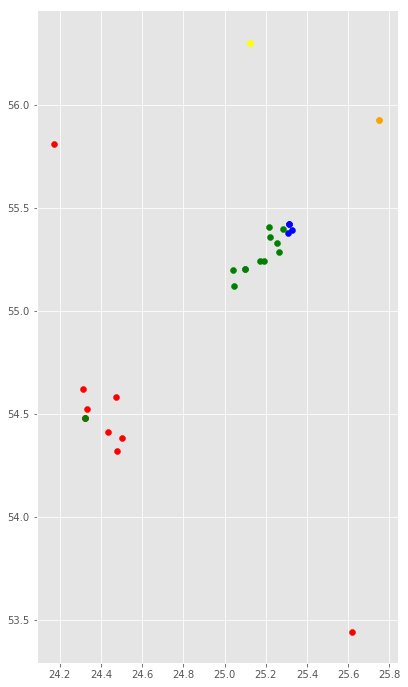

In [142]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.


# We can now plot our GeoDataFrame.
ax = world[world.continent == 'United Arab Emirates'].plot(
color='white', edgecolor='black')

colors=['red','blue','green','orange','yellow','white']
for j,i in enumerate(Sm.Region.unique()):
    print(i,colors[j])
    gdf[:-4][gdf.Region==i].plot(ax=ax, color=colors[j])
    
plt.show()

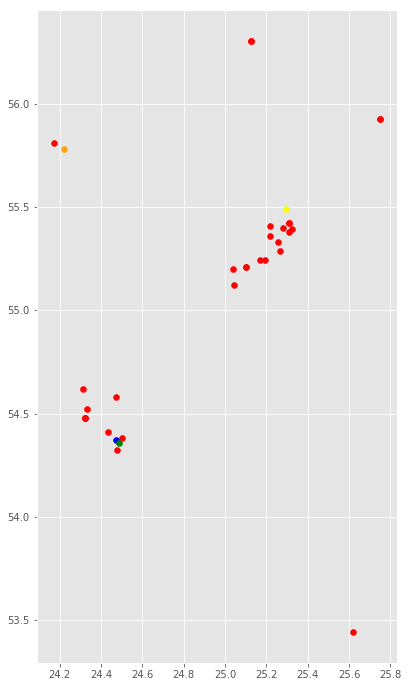

In [143]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'United Arab Emirates'].plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf[:-4].plot(ax=ax, color='red')
gdf[-4:-3].plot(ax=ax, color='blue')
gdf[-3:-2].plot(ax=ax, color='yellow')
gdf[-2:-1].plot(ax=ax, color='green')
gdf[-1:].plot(ax=ax, color='orange')


plt.show()

In [ ]:



lats, lons,names,altitude = [],[],[],[]

# the asos_stations file can be found here: 
# https://engineersportal.com/s/asos_stations.csv

for i in range(0,len(Sm)):
    print(i)
    names.append(data['CALL'])
    lats.append(float(data['LAT']))
    lons.append(float(data['LON']))
    altitude.append(float(data['ELEV']))

# How much to zoom from coordinates (in degrees)
zoom_scale = 0

# Setup the bounding box for the zoom and bounds of the map
bbox = [np.min(lats)-zoom_scale,np.max(lats)+zoom_scale,\
        np.min(lons)-zoom_scale,np.max(lons)+zoom_scale]

plt.figure(figsize=(12,6))
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

# Draw coastlines and fill continents and water with color
m.drawcoastlines()
m.fillcontinents(color='peru',lake_color='dodgerblue')

# draw parallels, meridians, and color boundaries
m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])
m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=45)
m.drawmapboundary(fill_color='dodgerblue')

# build and plot coordinates onto map
x,y = m(lons,lats)
m.plot(x,y,'r*',markersize=5)
plt.title("ASOS Station Distribution")
plt.savefig('asos_station_plot.png', format='png', dpi=500)
plt.show()